In [1]:
import ROOT;
import glob
import math
from IPython.display import display, Markdown
from IPython.display import display, HTML
from TPCQCVis.src.DrawHistogram import *
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.26/04


In [2]:
# Read the Root Files from LHC21k6
path = "/home/berki/Software/TPCQCVis/data/userFiles/"
fileList = glob.glob(path+"LHC21k6_302043.root")
rootDataFile=[]
for file in fileList:
    rootDataFile.append(ROOT.TFile.Open(file,"READ"))
#rootDataFile[0].ls()    
#rootDataFile[0].PID.ls()
#rootDataFile[0].Tracks.ls()

# Reporting on TPC QC status
Berkin Ulukutlu

## Looking at LHC21k6
> GP MinBias for pp@13.5 TeV Run 3 MC <br />
> JIRA: https://alice.its.cern.ch/jira/browse/O2-2777

**Using:**
+ `302043`: 1656347793629 - 27 Jun 2022 16:36 UTC - 27 Jun 2022 18:36 CEST

**General Notes**
+ Problem with the cuts on the Tracks task for async QC
 + Configurable cut parameters introduced in recent update but the values were not set in the json file
 + Bug in default cuts leads to empty plots
 + Fix merged: https://github.com/AliceO2Group/O2DPG/commit/805abd0242966a1beedacebd772afe6522243f35

---
## General performance observed on different runs

In [3]:
#Visual settings
#ROOT.gStyle.SetPalette(55)
ROOT.gStyle.SetOptStat(0)

## Looking at Cluster distributions

---
### hNClsPID

- Distribution as expected.
- **OK**

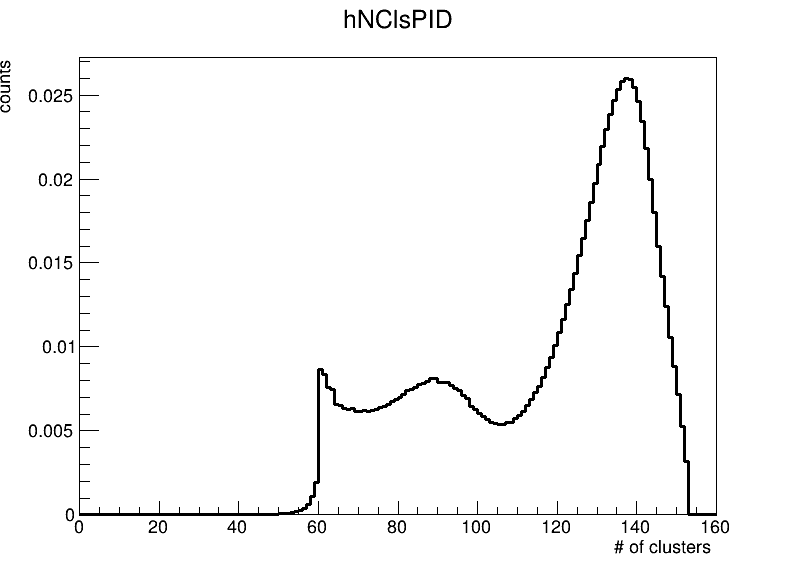

In [4]:
#%jsroot on
objectName="hNClsPID"
c = ROOT.TCanvas(objectName,objectName,800,600)
DrawDistributions(objectName,rootDataFile,len(rootDataFile))
c.Draw()
display(Markdown('---\n'+'### '+objectName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))

---
### h2DNClustersEtaBeforeCuts

- Distribution as expected.
- **OK**

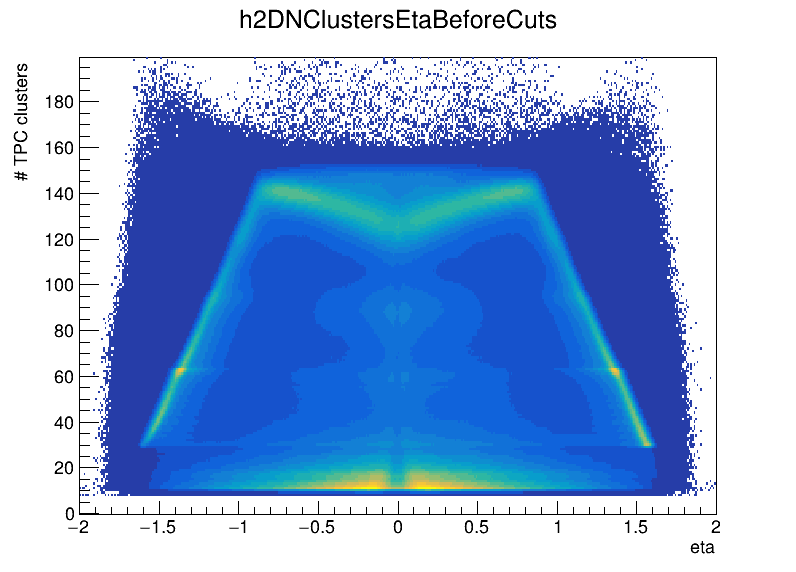

In [5]:
#%jsroot on
objectName="h2DNClustersEtaBeforeCuts"
c = ROOT.TCanvas(objectName,objectName,800,600)
DrawDistributions(objectName,rootDataFile,len(rootDataFile))
c.Draw()
display(Markdown('---\n'+'### '+objectName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))

---
### h2DNClustersPtBeforeCuts

- Distribution as expected.
- **OK**

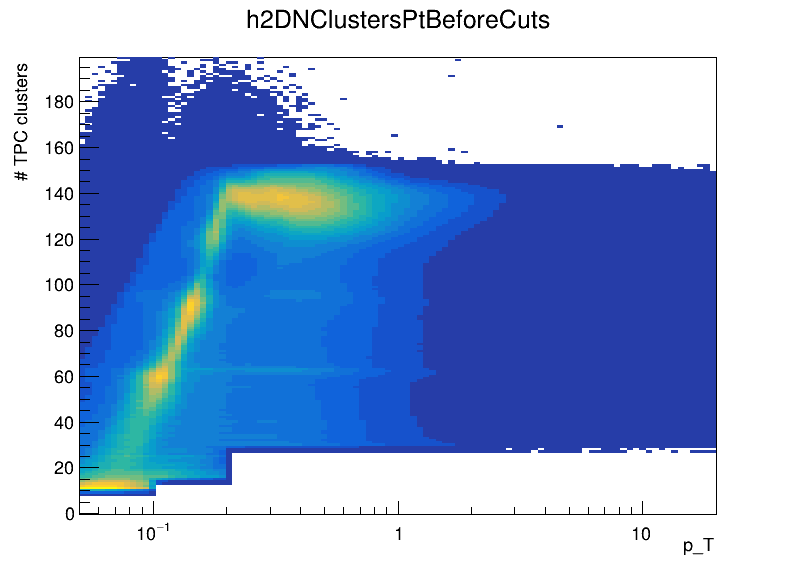

In [6]:
#%jsroot on
objectName="h2DNClustersPtBeforeCuts"
c = ROOT.TCanvas(objectName,objectName,800,600)
DrawDistributions(objectName,rootDataFile,len(rootDataFile),log="logx")
c.Draw()
display(Markdown('---\n'+'### '+objectName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))

## Looking at dEdx

---
### hdEdxVsPhi

- Distribution as expected.
- **OK**

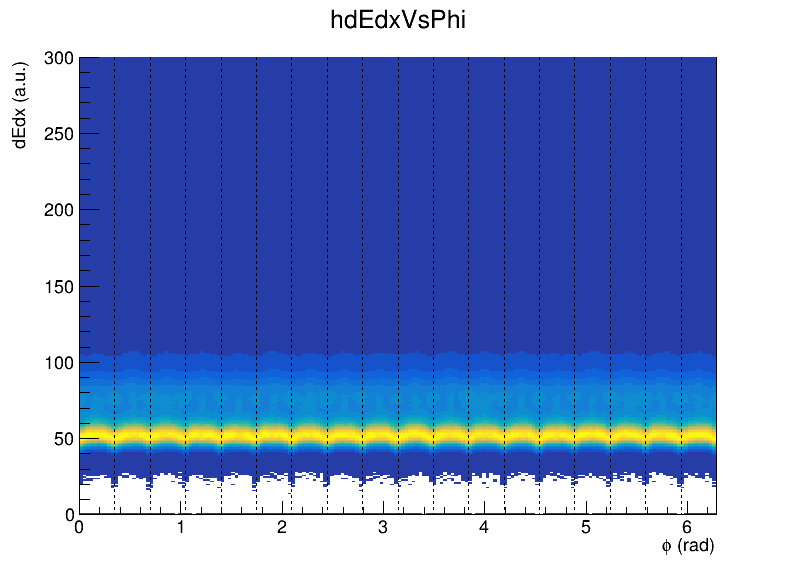

In [7]:
#%jsroot on
objectName="hdEdxVsPhi"
c = ROOT.TCanvas(objectName,objectName,800,600)
hist = DrawDistributions(objectName,rootDataFile,len(rootDataFile))
hist
#Sector boundatries
sectorBoundary = ROOT.TLine(0,0,0,300)
sectorBoundary.SetLineStyle(2)
for j in range(19):
    sectorBoundary.DrawLine((j*2*math.pi)/18,0,(j*2*math.pi)/18,300)
c.Draw()
display(Markdown('---\n'+'### '+objectName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))

---
### hdEdxTotVsP_TPC

- Distribution as expected.
- **OK**

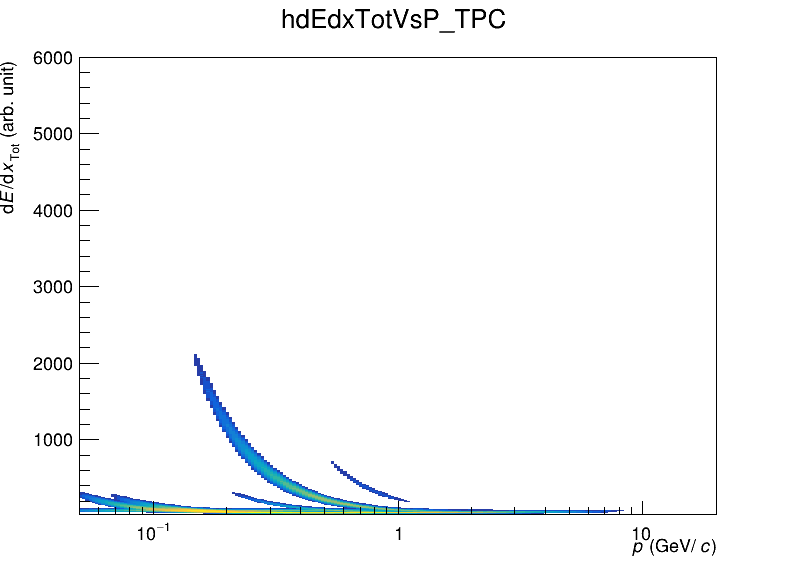

In [8]:
#%jsroot on
objectName="hdEdxTotVsP_TPC"
c = ROOT.TCanvas(objectName,objectName,800,600)
hist = DrawDistributions(objectName,rootDataFile,len(rootDataFile),log="logxz")
c.Draw()
display(Markdown('---\n'+'### '+objectName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))

---
### MIPs

- MIP peak at 50 as expected. However some contamination from electrons can be observed. Need to refine the cuts for MIP selection to get rid of the electrons.
- **OK**

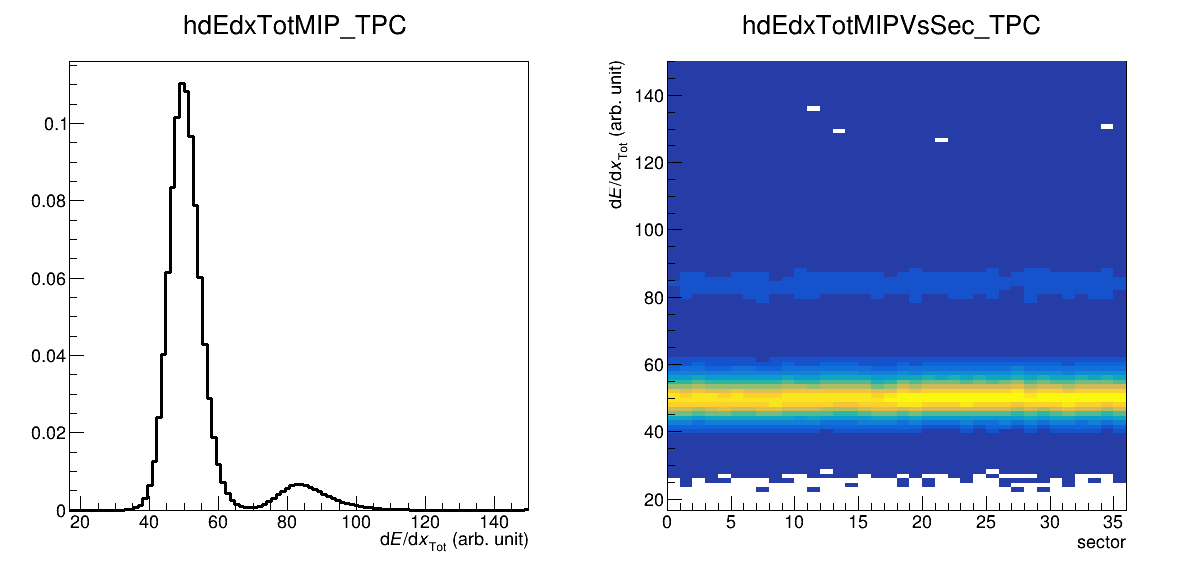

In [9]:
#%jsroot on
canvasName="MIPs"
c = ROOT.TCanvas(canvasName,canvasName,1200,600)
c.Divide(2,1)
c.cd(1)
objectName="hdEdxTotMIP_TPC"
hist = DrawDistributions(objectName,rootDataFile,len(rootDataFile))

c.cd(2)
objectName="hdEdxTotMIPVsSec_TPC"
hist2 = DrawDistributions(objectName,rootDataFile,len(rootDataFile))

c.Draw()
display(Markdown('---\n'+'### '+canvasName))
display(Markdown('- MIP peak at 50 as expected. However some contamination from electrons can be observed. Need to refine the cuts for MIP selection to get rid of the electrons.\n'+
                 '- **OK**'))

---
### tan(lambda)

- Distribtuion as expected.
- **OK**

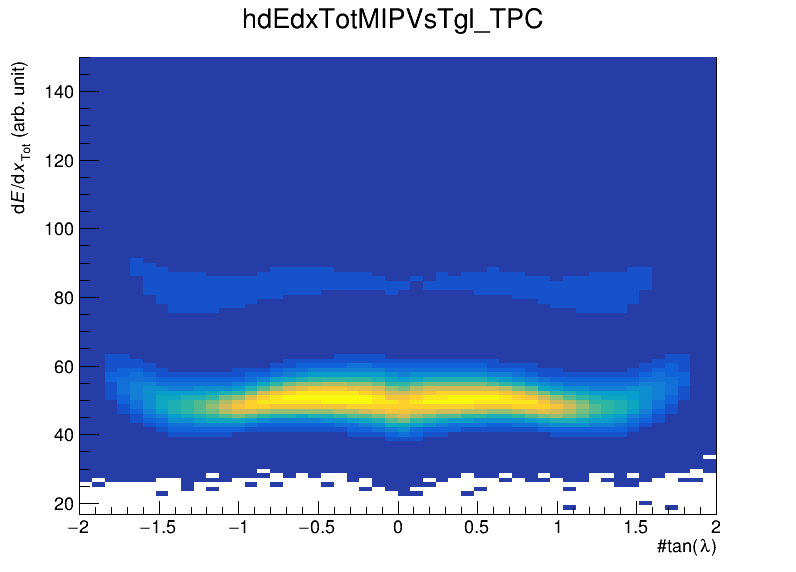

In [10]:
#%jsroot on
canvasName="tan(lambda)"
c = ROOT.TCanvas(canvasName,canvasName,800,600)

objectName="hdEdxTotMIPVsTgl_TPC"
hist = DrawDistributions(objectName,rootDataFile,len(rootDataFile))

c.Draw()
display(Markdown('---\n'+'### '+canvasName))
display(Markdown('- Distribtuion as expected.\n'+
                 '- **OK**'))

---
### sin(phi)

- Distribution as expected.
- **OK**

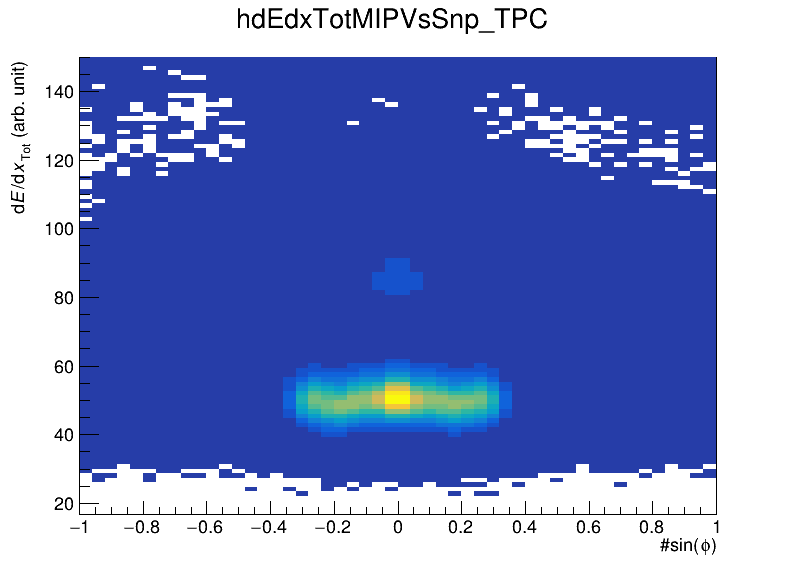

In [11]:
#%jsroot on
canvasName="sin(phi)"
c = ROOT.TCanvas(canvasName,canvasName,800,600)

objectName="hdEdxTotMIPVsSnp_TPC"
hist = DrawDistributions(objectName,rootDataFile,len(rootDataFile))

c.Draw()
display(Markdown('---\n'+'### '+canvasName))
display(Markdown('- Distribution as expected.\n'+
                 '- **OK**'))